In [43]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [44]:
df1 = pd.read_csv('./Datasets/stats_pl.csv')
df2 = pd.read_csv('./Datasets/worldometer_data.csv')
#day = pd.read_csv('day_wise.csv')
country = pd.read_csv('./Datasets/country_wise_latest.csv')

## Universidade Federal da Paraíba
## Centro de Informática
## Curso: *Ciência de Dados e Inteligência Artificial*
## Grupo: *Arthur Ricardo, Danilo Henrique, Vinicius dos Santos*
    
## <h1><center><font color='red'> Data analysis of COVID-19 and Status of the PL</font></center></h1>

## 1. Introdução

O presente trabalho tem como objetivo aprofundar o conhecimento em ciência de dados, analisando dataset's utilizando métodos como, medidas de centralidade e dispersão, visualização de dados, limpeza e transformação, aplicações de regressão linear e agrupamentos.
 
Os dataset's utilizados tem como base o COVID-19 e Status da Premier League. Com eles foi possível definirmos objetivos como, analisar a correlação entre duas features e visualiza-las graficamente através de agrupamentos e como predizer um resultado de acordo com as informações contidas nos dataset's.
    
Para fazer a análise do dataset é necessário verificar se os dados estão preparados para serem testados pois, caso não, o conjunto de dados deve passar por uma etapa de pré-processamento e transformação e apenas assim serem utilizados.

Aplicando a linguagem Python e com a ajuda de diversas bibliotecas como Pandas, Numpy, Seaborn, Sklearn, entre outras, podemos realizar todos esses processos, como também calcular e visualizar graficamente todos os resultados.

## 2. Dados Usados

### 2.1 Status da Premier League

O dataset *Status da Premier league* são estatísticas coletadas do Opta (coletor de estatísticas oficiais da Premier League) de cada equipe em cada temporada (totais da temporada) de 2006/2007 (ou seja, a temporada a partir da qual a coleta dessas estatísticas detalhadas começou) a 2017/2018.

As estatísticas podem ser categorizadas da seguinte forma:

**Geral**

*Colunas* (1-5)

wins, losses, goals, yellow cards, red cards

**Ataque**

*Colunas 6-15*

shots, shots on target, hit woodwork, goals from header, goals from penalty, goals from free kick, goals from inside box, goals from outside box, goals from counter attack, offsides

**Defesa**

*Colunas 16-28*

clean sheets, goals conceded, saves, blocks, interceptions, tackles, last man tackles, clearances, headed clearances, own goals, penalties conceded, goals conceded from penalty

**Time**

*Colunas 29-34*

passes, through balls, long passes, backwards passes, crosses, corners taken

**Outros**

*Colunas 35-42*

touches, big chances missed, clearances off line, dispossessed, penalties saved, high claims, punches, season

### 2.2 COVID-19

O dataset do COVID-19 possui 103 linhas e 13 colunas. Cada linha é uma região e as colunas informam a população da região, o número de casos, o número de mortes, o número de testes entre outras informações.

### 3. Exploração Inicial dos Dados

Inicialmente carregamos, visualizamos os dados e fizemos uma exploração inicial, ou seja, acessamos colunas específicas, calculamos as medidas de centralidade e dispersão, e também analisamos o bloxplot dessas colunas. Sendo assim, obtivemos a média, moda, mediana e desvio padrão do dataset. 

Para visualizarmos melhor o bloxplot do dataset COVID-19, como existem vários outliers optamos por tirar o logaritmo desses valores e plotar o bloxplot.



### 3.1 Exploração Inicial dos Dados - Status da PL

In [45]:
df1.mean()

wins                       14.150000
losses                     14.150000
goals                      51.062500
total_yel_card             61.079167
total_red_card              2.862500
total_scoring_att         514.241667
ontarget_scoring_att      168.116667
hit_woodwork               12.283333
att_hd_goal                 9.016667
att_pen_goal                3.650000
att_freekick_goal           1.495833
att_ibox_goal              43.341667
att_obox_goal               7.741667
goal_fastbreak              2.983333
total_offside              86.291667
clean_sheet                10.945833
goals_conceded             51.062500
saves                      51.736364
outfielder_block          132.133333
interception              555.179167
total_tackle              762.133333
last_man_tackle             5.900000
total_clearance          1252.416667
head_clearance            675.236364
own_goals                   1.966667
penalty_conceded            4.750000
pen_goals_conceded          3.650000
t

In [46]:
df1.median()

wins                       12.0
losses                     15.0
goals                      47.0
total_yel_card             60.5
total_red_card              3.0
total_scoring_att         498.5
ontarget_scoring_att      158.5
hit_woodwork               11.5
att_hd_goal                 9.0
att_pen_goal                3.5
att_freekick_goal           1.0
att_ibox_goal              40.0
att_obox_goal               7.0
goal_fastbreak              2.0
total_offside              85.0
clean_sheet                10.0
goals_conceded             51.0
saves                       9.0
outfielder_block          132.0
interception              558.5
total_tackle              747.5
last_man_tackle             4.0
total_clearance          1176.5
head_clearance            635.0
own_goals                   2.0
penalty_conceded            5.0
pen_goals_conceded          3.0
total_pass              14937.0
total_through_ball         60.5
total_long_balls         2276.5
backward_pass            2374.0
total_cr

In [47]:
df1.std()

wins                       6.022482
losses                     5.596846
goals                     16.203474
total_yel_card            10.078249
total_red_card             1.802442
total_scoring_att         95.979164
ontarget_scoring_att      38.748882
hit_woodwork               4.820950
att_hd_goal                3.659077
att_pen_goal               2.052246
att_freekick_goal          1.335069
att_ibox_goal             14.324684
att_obox_goal              3.659105
goal_fastbreak             2.418490
total_offside             20.736198
clean_sheet                4.150060
goals_conceded            13.209617
saves                     56.406334
outfielder_block          31.941744
interception             141.363020
total_tackle             104.704200
last_man_tackle            5.436434
total_clearance          327.233390
head_clearance           182.963575
own_goals                  1.471818
penalty_conceded           2.262113
pen_goals_conceded         1.930378
total_pass              3176

In [48]:
df1.describe()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,160.000000,240.000000,240.000000,240.000000,160.000000,240.000000,220.000000,240.000000,240.000000,240.000000
mean,14.150000,14.150000,51.062500,61.079167,2.862500,514.241667,168.116667,12.283333,9.016667,3.650000,...,2465.650000,831.370833,207.191667,23908.962500,39.200000,4.991667,472.968182,0.837500,54.920833,22.783333
std,6.022482,5.596846,16.203474,10.078249,1.802442,95.979164,38.748882,4.820950,3.659077,2.052246,...,491.135729,118.551756,35.933177,3247.161627,13.391915,2.804646,84.653006,0.947718,18.780999,9.148869
min,1.000000,2.000000,20.000000,38.000000,0.000000,338.000000,94.000000,4.000000,1.000000,0.000000,...,1382.000000,572.000000,136.000000,16772.000000,18.000000,0.000000,296.000000,0.000000,19.000000,4.000000
25%,10.000000,10.000000,40.000000,54.000000,1.000000,441.000000,140.000000,9.000000,6.000000,2.000000,...,2120.000000,749.000000,180.000000,21577.000000,30.000000,3.000000,412.750000,0.000000,40.000000,17.000000
50%,12.000000,15.000000,47.000000,60.500000,3.000000,498.500000,158.500000,11.500000,9.000000,3.500000,...,2374.000000,818.000000,201.000000,23168.500000,37.000000,5.000000,465.000000,1.000000,53.000000,22.000000
75%,18.000000,19.000000,61.000000,67.000000,4.000000,572.000000,194.250000,15.000000,12.000000,5.000000,...,2808.750000,911.250000,230.000000,26294.000000,44.250000,7.000000,522.500000,1.000000,68.000000,27.000000
max,32.000000,29.000000,106.000000,94.000000,9.000000,834.000000,288.000000,33.000000,18.000000,11.000000,...,4546.000000,1156.000000,309.000000,35130.000000,88.000000,16.000000,776.000000,5.000000,118.000000,66.000000


In [49]:
df1['corner_taken'].mean()

207.19166666666666

In [50]:
df1['corner_taken'].median()

201.0

In [51]:
df1['corner_taken'].mode()

0    181.0
dtype: float64

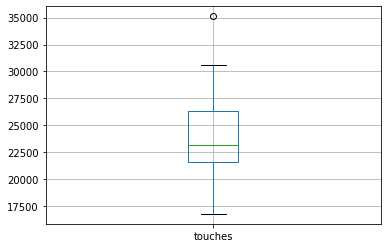

In [52]:
df1.boxplot(column='touches')

### 3.2 Exploração de dados inicial COVID-19

In [53]:
df2.mean()

Population          3.041549e+07
TotalCases          9.171850e+04
NewCases            1.980500e+03
TotalDeaths         3.792590e+03
NewDeaths           3.000000e+02
TotalRecovered      5.887898e+04
NewRecovered        1.706000e+03
ActiveCases         2.766433e+04
Serious,Critical    5.343934e+02
Tot Cases/1M pop    3.196024e+03
Deaths/1M pop       9.868118e+01
TotalTests          1.402405e+06
Tests/1M pop        8.395937e+04
dtype: float64

In [54]:
df2.median()

Population          7041972.5
TotalCases             4491.0
NewCases                656.0
TotalDeaths             113.0
NewDeaths                80.0
TotalRecovered         2178.0
NewRecovered            936.0
ActiveCases             899.0
Serious,Critical         27.5
Tot Cases/1M pop       1015.0
Deaths/1M pop            29.0
TotalTests           135702.0
Tests/1M pop          32585.0
dtype: float64

In [55]:
df2.std()

Population          1.047661e+08
TotalCases          4.325867e+05
NewCases            3.129611e+03
TotalDeaths         1.548718e+04
NewDeaths           4.511995e+02
TotalRecovered      2.566984e+05
NewRecovered        2.154780e+03
ActiveCases         1.746327e+05
Serious,Critical    2.047519e+03
Tot Cases/1M pop    5.191986e+03
Deaths/1M pop       1.749569e+02
TotalTests          5.553367e+06
Tests/1M pop        1.527306e+05
dtype: float64

In [56]:
df2.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [57]:
df2['TotalDeaths'].mean()

3792.590425531915

In [58]:
df2['TotalDeaths'].median()

113.0

In [59]:
df2['TotalDeaths'].std()

15487.184877168185

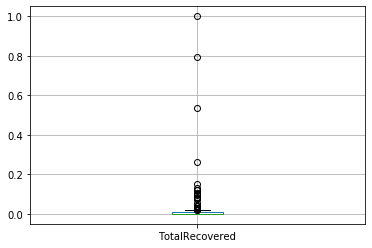

In [60]:
df2['TotalRecovered'] = df2['TotalRecovered']/max(df2['TotalRecovered'])
#df2['TotalRecovered'] = np.log(df2['TotalRecovered'])
df2.boxplot(column='TotalRecovered')


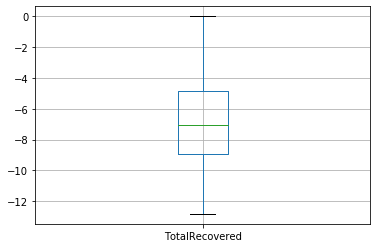

In [85]:
df2['TotalRecovered'] = df2['TotalRecovered']/max(df2['TotalRecovered']) 
df2['TotalRecovered'] = np.log(df2['TotalRecovered']) # Aplicando o logoratimo para termos uma melhor visualização
df2.boxplot(column='TotalRecovered')


## 4. Pré-processamento e Limpeza de dados

Nesta etapa verificamos todos os dados faltantes e observamos algumas colunas do dataset *Status da PL* que tinham linhas preenchidas com o valor **NaN**. Para tratar esses dados optamos por retirar as colunas pois, não podíamos substituir pelo valor anterior ou pela média dos valores, visto que, essa informação não iria condizer com a realidade da temporada. 

Por exemplo: Na coluna *big_chance_missed*, um time poderia ter criado 50 chances, porém esta informação poderia não estar no dataset logo, se usássemos a informação anterior e a mesma fosse menor que o verdadeiro, estaríamos criando dados falsos. 

Outro motivo pelo qual escolhemos as colunas é que, o dataset tem 42 colunas, quando dropamos estas features nos resta 36 colunas. Se escolhêssemos dropar as linhas, perderíamos informações de 3 temporadas.

Para o dataset do COVID-19 tivemos uma abordagem diferente visto que, existiam valores faltantes na maioria das colunas logo não seria viável dropar todas essas informações mas observamos que, algumas colunas possuiam mais valores faltantes do que outras e optamos por dropar essas colunas também. Os valores faltantes restantes substituímos pelo valor anterior das instâncias que não tinham dados faltantes.

In [61]:
df1.isnull().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

In [62]:
df1_new = df1.drop(columns=['head_clearance', 'dispossessed', 'backward_pass', 'saves', 'total_through_ball', 'big_chance_missed'])

In [63]:
df1_new

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,18723.0,2397.0,918.0,258.0,25686.0,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,16759.0,2270.0,897.0,231.0,24010.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,17154.0,2800.0,1107.0,282.0,24150.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,18458.0,2045.0,873.0,278.0,25592.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,14914.0,2408.0,796.0,181.0,22200.0,2.0,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,14960.0,2563.0,765.0,165.0,22619.0,6.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,15721.0,2580.0,694.0,150.0,22775.0,1.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,17174.0,2541.0,800.0,227.0,24639.0,4.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,12892.0,2528.0,598.0,136.0,20368.0,3.0,0.0,27.0,14.0,2017-2018


In [64]:
df2.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [65]:
df2_new = df2.drop(columns=['NewCases', 'NewDeaths', 'NewRecovered'])

In [66]:
df2.fillna(method='bfill')
df2.dropna()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129066160.0,462690,6590.0,50517.0,819.0,0.119863,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
28,Bolivia,South America,11688459.0,86423,1282.0,3465.0,80.0,0.010623,936.0,55585.0,71.0,7394.0,296.0,183583.0,15706.0,Americas
72,S. Korea,Asia,51273732.0,14519,20.0,303.0,1.0,0.005256,42.0,673.0,18.0,283.0,6.0,1613652.0,31471.0,WesternPacific


In [67]:
df2

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,1.000000,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,0.794693,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,0.534560,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,0.262493,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,0.150317,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,0.000004,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,0.000003,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,0.000005,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,0.000005,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


## 5. Objetivos

### 5.1 - Qual a relação em fazer mais gols e ser campeão?

Com esse código é possível obter os times que mais fizeram gols em suas respectivas seasons

In [68]:
seasons = df1['season'].unique()

In [69]:
lista = [df1[df1['season'] == season]['goals'].sort_values(ascending=False).index[0] for season in seasons]

In [70]:
df1.loc[lista]

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008
42,Liverpool,25.0,2.0,77.0,50.0,0.0,736.0,224.0,26.0,14.0,...,1021.0,269.0,29875.0,NaN,0.0,470.0,0.0,61.0,19.0,2008-2009
60,Chelsea,27.0,6.0,103.0,54.0,5.0,834.0,288.0,13.0,16.0,...,1083.0,286.0,28914.0,NaN,3.0,503.0,1.0,87.0,30.0,2009-2010
80,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,15.0,18.0,...,1005.0,243.0,26671.0,50.0,2.0,471.0,0.0,45.0,16.0,2010-2011
100,Manchester City,28.0,5.0,93.0,51.0,5.0,738.0,250.0,21.0,10.0,...,843.0,269.0,28620.0,65.0,6.0,480.0,1.0,39.0,21.0,2011-2012
120,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,...,962.0,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0,2012-2013
140,Manchester City,27.0,6.0,102.0,72.0,1.0,673.0,238.0,19.0,10.0,...,892.0,283.0,28341.0,59.0,0.0,411.0,0.0,64.0,31.0,2013-2014
161,Manchester City,24.0,7.0,83.0,77.0,2.0,670.0,229.0,18.0,5.0,...,795.0,277.0,29652.0,42.0,1.0,546.0,1.0,52.0,31.0,2014-2015
182,Manchester City,19.0,10.0,71.0,61.0,0.0,615.0,210.0,15.0,13.0,...,866.0,257.0,28396.0,50.0,2.0,556.0,0.0,38.0,41.0,2015-2016


Com isso verificamos os campeões da premier league nessas seasons e comparamos com essa tabela. Concluímos que das 12 seasons em que um time teve mais gols, 7 deles foram campeões. 

### 5.2 - Qual time recebeu mais cartões amarelos  em uma season?

Basicamente usamos a mesma lógica do código anterior. Verificamos quais os times que receberam mais cartões amarelos em suas respectivas seasons e buscamos o time com a maior quantidade de cartões amarelos

In [71]:
lista2 = [df1[df1['season'] == season]['total_yel_card'].sort_values(ascending=False).index[0] for season in seasons]

In [72]:
df_yel = df1.loc[lista2]
df_yel

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
11,West Ham United,12.0,21.0,35.0,85.0,2.0,461.0,134.0,8.0,3.0,...,849.0,196.0,20040.0,NaN,5.0,NaN,0.0,64.0,25.0,2006-2007
33,Middlesbrough,10.0,16.0,43.0,86.0,2.0,499.0,152.0,13.0,9.0,...,960.0,219.0,21064.0,NaN,2.0,575.0,0.0,68.0,38.0,2007-2008
53,Blackburn Rovers,10.0,17.0,40.0,74.0,4.0,473.0,148.0,13.0,9.0,...,865.0,199.0,23450.0,NaN,9.0,372.0,0.0,48.0,36.0,2008-2009
72,Sunderland,11.0,16.0,48.0,77.0,9.0,444.0,159.0,11.0,10.0,...,884.0,180.0,22903.0,NaN,7.0,534.0,0.0,54.0,30.0,2009-2010
94,Newcastle United,11.0,14.0,56.0,78.0,2.0,507.0,168.0,10.0,15.0,...,1022.0,202.0,22108.0,62.0,7.0,527.0,0.0,56.0,26.0,2010-2011
105,Chelsea,18.0,10.0,65.0,74.0,4.0,671.0,224.0,20.0,12.0,...,972.0,253.0,26276.0,37.0,10.0,571.0,0.0,70.0,17.0,2011-2012
135,Stoke City,9.0,14.0,34.0,78.0,4.0,390.0,114.0,12.0,9.0,...,855.0,165.0,19830.0,35.0,3.0,397.0,0.0,91.0,6.0,2012-2013
153,Aston Villa,10.0,20.0,39.0,78.0,0.0,431.0,135.0,11.0,10.0,...,749.0,163.0,21453.0,27.0,3.0,359.0,1.0,102.0,15.0,2013-2014
179,Sunderland,7.0,14.0,31.0,94.0,2.0,408.0,130.0,11.0,8.0,...,687.0,186.0,22037.0,23.0,3.0,411.0,0.0,82.0,17.0,2014-2015
199,Aston Villa,3.0,27.0,27.0,75.0,3.0,380.0,110.0,7.0,6.0,...,796.0,167.0,23234.0,20.0,5.0,338.0,1.0,66.0,28.0,2015-2016


In [73]:
df_yel[df_yel["total_yel_card"] == 94] ## Time que mais recebeu cartões amarelos

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
179,Sunderland,7.0,14.0,31.0,94.0,2.0,408.0,130.0,11.0,8.0,...,687.0,186.0,22037.0,23.0,3.0,411.0,0.0,82.0,17.0,2014-2015


### 5.3 - Com base no dataset qual a probabilidade de um time ser campeão?

Como visto anteriormente, analisamos a relação de um time fazer mais gols e ser campeão. Com isso podemos calcular a probabilidade, visto que, temos as informações dos times que fizeram mais gols e foram campões. 

Concluímos que, existe a probabilidade de 58,33% de um time ser campeão de acordo com a quantidade de gols.

### 5.4 - As chances de um time ter um jogador expulso?

Criamos uma coluna para termos a porcentagem de um time ter um jogador expulso baseado nas informações de faltas e cartões vermelhos.

Feito isso, definimos uma condição para descobrirmos qual o time tem a maior chance de ter um jogador expulso entre todas as seasons e o resultado foi o time do Queens park rangers.

In [74]:
df1['chance_out'] = 100*((df1['total_red_card'])/df1['total_tackle'])

In [75]:
df1[['team','total_tackle','total_yel_card','total_red_card','chance_out']]

,team,total_tackle,total_yel_card,total_red_card,chance_out
0,Manchester United,890.0,60.0,1.0,0.112360
1,Chelsea,982.0,62.0,4.0,0.407332
2,Liverpool,969.0,44.0,0.0,0.000000
3,Arsenal,998.0,59.0,3.0,0.300601
4,Tottenham Hotspur,995.0,48.0,3.0,0.301508
...,...,...,...,...,...
235,Huddersfield Town,744.0,62.0,3.0,0.403226
236,Swansea City,610.0,51.0,1.0,0.163934
237,Southampton,658.0,63.0,2.0,0.303951
238,Stoke City,678.0,62.0,1.0,0.147493


In [76]:
df1[df1['chance_out'] == df1['chance_out'].max()]

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,chance_out
116,Queens Park Rangers,10.0,21.0,43.0,54.0,9.0,539.0,150.0,15.0,10.0,...,195.0,21309.0,23.0,8.0,429.0,0.0,26.0,22.0,2011-2012,1.17801


### 5.5 - Qual a precisão de finalização utilizando os chutes ao gol e a quantidade de gols de um time?

Para esta pergunta decidimos criar uma nova coluna no dataset onde teríamos a informação da finalização de um time com base no chutes ao gol e a quantidade de gols.

Também observamos que a relação de finalização e vitórias é linear e com isso podemos fazer uma análise por meio de Regressão.

In [77]:
df1['precision'] = 100*(df1['goals']/df1['ontarget_scoring_att'])

In [78]:
df1['precision']

0      32.421875
1      29.629630
2      26.635514
3      27.876106
4      30.978261
         ...    
235    25.688073
236    27.184466
237    25.517241
238    26.515152
239    27.192982
Name: precision, Length: 240, dtype: float64

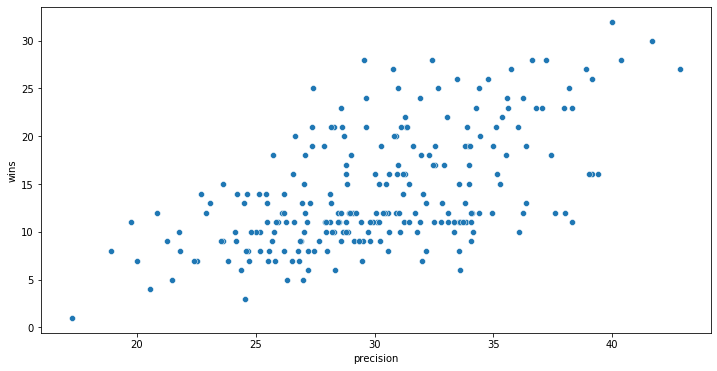

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x='precision',y='wins')

In [80]:
x = np.array(df1['precision']).reshape(-1,1)
y = np.array(df1['wins']).reshape(-1,1)

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
a = model.coef_[0][0]
b = model.intercept_[0]
a,b

(0.7506614753003739, -8.438846820891316)

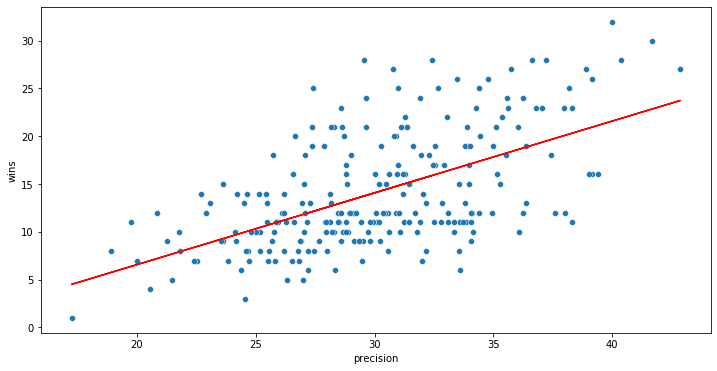

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1,x='precision',y='wins')
plt.plot(x, a*x + b, c='red')

Com isso podemos descobrir qual a precisão de finalização para um time obter 20 vitórias e quantas vitórias são necessárias para um time ter uma boa finalização.


### 5.6 - Qual a correlação com a quantidade de vitórias de um time.

Observamos uma correlação de aproximadamente 0,57, podemos ver que sim, há uma relação entre a precisão na hora de finalizar e a quantidade de vitórias de um time, o que é bem intuitivo de perceber uma vez que, um time que finaliza melhor consegue marcar mais gols e consequentemente ter mais vitorias. Um motivo para explicar que essa correlação não seja maior, é que alguns jogos podem ter uma maior taxa de finalização que outros, mesmos contando com apenas uma vitória.

In [83]:
df_corr = df1[["precision", "wins"]]

In [84]:
df1["precision"].corr(df1["wins"])

0.5729421036517196

## 6. Conclusão

O presente trabalho abordou diversas técnicas de ciência de dados. Com isso foi possível mostrar que podemos extrair diversas informações dos dataset como saber se as medidas de centralidade e dispersão estão boas, analisar a presença de outliers nos boxplot, analisar a correlação entre as features, e aplicar regressão linear para predizer resultados.

Visando melhorar ainda mais o trabalho, em relação ao dataset *Status da PL*, como o dataset possui informações das temporadas 2006/2007 até 2017/2018, e como visto anteriormente alguns desses valores não exise, logo seria recomendado atualizar o dataset em um intervalo mais atual.

O segundo ponto seria fazer a mesma abordagem para o dataset do COVID-19, visto que teríamos informações mais precisas e não precisaríamos substituir valores ou dropar alguma coluna. Atualmente os casos em alguns países diminuíram e uma possível cura está em desenvolvimento, com isso, seria possível descobrir quais países responderam melhor a vacina.
